# Principal Component Analysis

PCA é uma técnica de redução de dimensões que serve para simplificar um conjunto de dados para encontrar informaçõe específicas, no exemplo que iremos abordar, irá sair de um quadro com quatro dimensões para duas, deixando mais fácil a visualização dos dados que queremos.

In [2]:
from clyent import color
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


No código acima usamos uma função da biblioteca do sklearn para verificarmos o número de dimensões (que são 4) e a quantidade de exemplares (150), já os nomes se referem as espécies-alvos da análise, das 150 essas 3 são as principais que dividem todas as outras.

In [4]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

X é a variável que irá carregar todos nosso dados anteriormente puxados e criamos um modelo de PCA, que possuem as especificações de (n_components=2) 2 dimensões, e whiten=true para normalizar os dados e os deixar organizados. Em seguida uma variável para guardar o pca criado a partir dos dados X.

In [6]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Aqui os valores após conversão

In [7]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.9776852063187949


Aqui averiguamos o quanto há de preservação dos dados, sendo assim temos 92% de dados preservados na primeira dimensão e uma variação de 5% na segunda, sendo assim, 97% de preservação total dos dados

No código abaixo criamos um mapa para observamos os dados, primeiro a paleta de cores sendo rgb (red green blue) e mapeando pelos nomes das espécies, fazemos a iteração para cada espécie acompanhar uma cor, seu dado que os transformamos a visualização em bidimensional e geramos o mapa scatter, e assim printamos a legenda e o mapa.

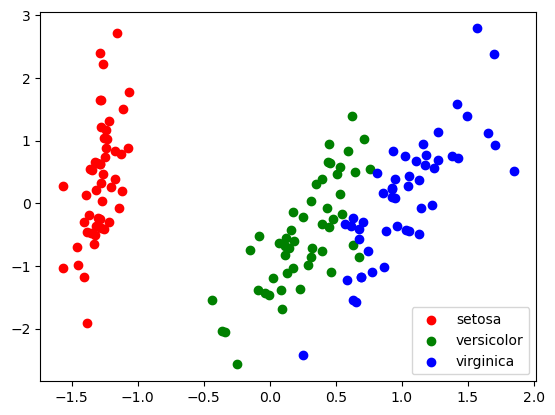

In [9]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

## Activity

In [52]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))
%matplotlib inline


150
4
['setosa', 'versicolor', 'virginica']


In [49]:
X = iris.data 
pca = PCA(n_components=1, whiten=True).fit(X) #1 componente
X_pca = pca.transform(X)

In [50]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [41]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648 0.01710261]
0.9947878161267246


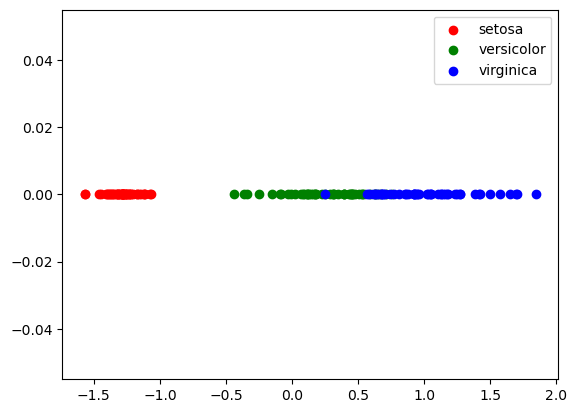

In [51]:
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()

for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], [0] * sum(iris.target == i),  #setando para apenas um componente (1 dimensão) 
               c=c, label=label)
    
pl.legend()
pl.show()

Aqui é feito o teste com apenas uma dimensão, vemos uma disparidade muito grande da espécie setosa
por estar em um grande extremo em relação as outras duas espécies, que estão mais próximas entre si, observando 
até que a virginica está até num ponto mais extremo que a versicolor, que é um ponto médio em relação as outra duas.
Não de forma incontestável, haja visto que seja apenas uma unica dimensao de gráfico, mas é uma das abordagens que
se pode ter.